<a href="https://colab.research.google.com/github/vahedshaik/catchupquiz/blob/main/clustering_alogorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the required modules

In [ ]:
#load the necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [ ]:
! pip install pycaret

  Using cached pycaret-2.3.5-py3-none-any.whl (288 kB)
  Using cached mlflow-1.22.0-py3-none-any.whl (15.5 MB)
     |████████████████████████████████| 86 kB 3.2 MB/s 
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached pyod-0.9.5.tar.gz (113 kB)
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 38.9 MB/s 
     |████████████████████████████████| 167 kB 57.7 MB/s 
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 10.1 MB 28.8 MB/s 
     |████████████████████████████████| 596 kB 48.9 MB/s 
     |██████████████████

Loading the Mall Customers Dataset

In [ ]:
#load the input data
mall_customers=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
mall_customers.shape

(200, 4)

In [ ]:
mall_customers.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
mall_customers.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [ ]:
mall_customers.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [ ]:
#create a minmax scaler
scaler=MinMaxScaler()
scaled_data =scaler.fit_transform(mall_customers)
Scaled_Df = pd.DataFrame(scaled_data, columns=mall_customers.columns)

In [ ]:
Scaled_Df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.019231,0.000000,0.387755
1,0.005025,0.057692,0.000000,0.816327
2,0.010050,0.038462,0.008197,0.051020
3,0.015075,0.096154,0.008197,0.775510
4,0.020101,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.979899,0.326923,0.860656,0.795918
196,0.984925,0.519231,0.909836,0.275510
197,0.989950,0.269231,0.909836,0.744898
198,0.994975,0.269231,1.000000,0.173469


PCA to Reduce Dimensionality

In [ ]:
pca=PCA(n_components=2)
plot_pca = pca.fit_transform(Scaled_Df)
pca_df = pd.DataFrame(plot_pca)

K Means Clustering

In [ ]:
colors = ["g","r","c","b","k"]

class K_Means:
    def __init__(self, k=4, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

3776.536975532471
80.88067249704508
145.62075612345953
397.9920907117269
45.690785312700775
3.4436600663574595
3.7243455558410212
30.184880368633465
9.28463996074229
3.0413840753424006
6.259757554442363
2.8708018894362
2.292661267079265


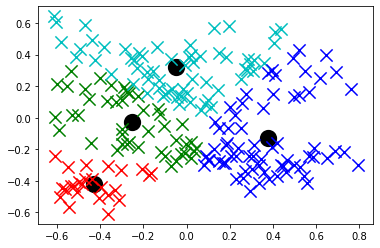

In [ ]:
clf = K_Means()

X = np.array(pca_df)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

K-Means

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Scaled_Df)
print("Cluster:")
print(kmeans.cluster_centers_)

Cluster:
[[0.7992401  0.28330206 0.57896841 0.81533101]
 [0.34346734 0.70705128 0.26994536 0.41615646]
 [0.79786432 0.42836538 0.58135246 0.19132653]
 [0.24929733 0.15286832 0.19491525 0.58232446]]


Visualization after PCA

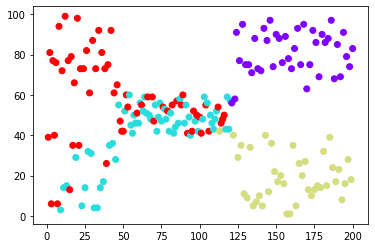

In [ ]:
plt.scatter(mall_customers.iloc[:,0], mall_customers.iloc[:, 3], c=kmeans.labels_,cmap='rainbow')
plt.show()

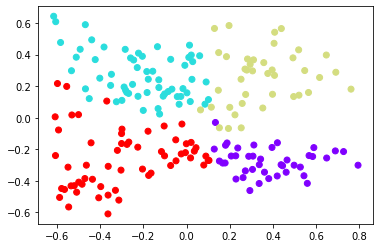

In [ ]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=kmeans.labels_,cmap='rainbow')
plt.show()

**Hierarchical Clustering**

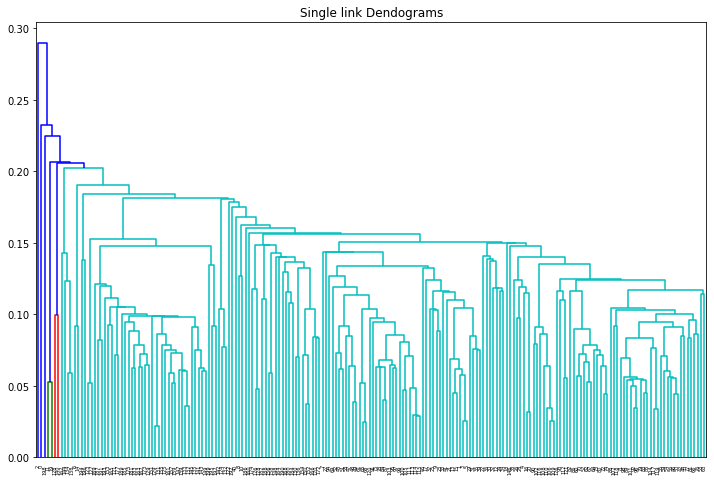

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Single link Dendograms")
dend = shc.dendrogram(shc.linkage(Scaled_Df, method="single"))
plt.show()


Visualization without PCA

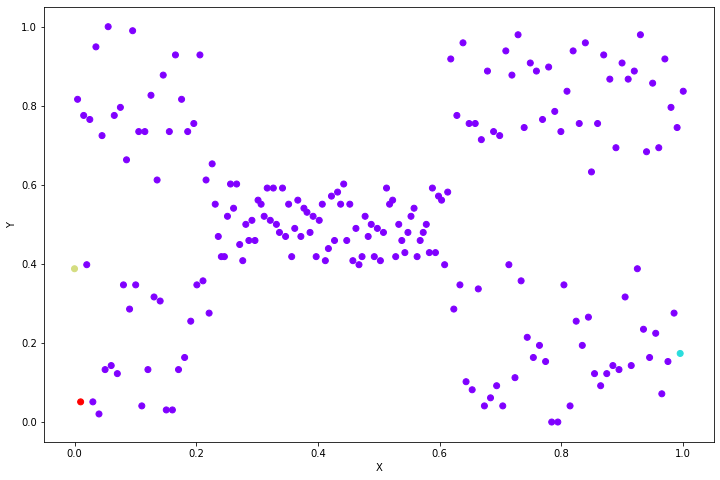

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="single")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:,3], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Visualization after PCA

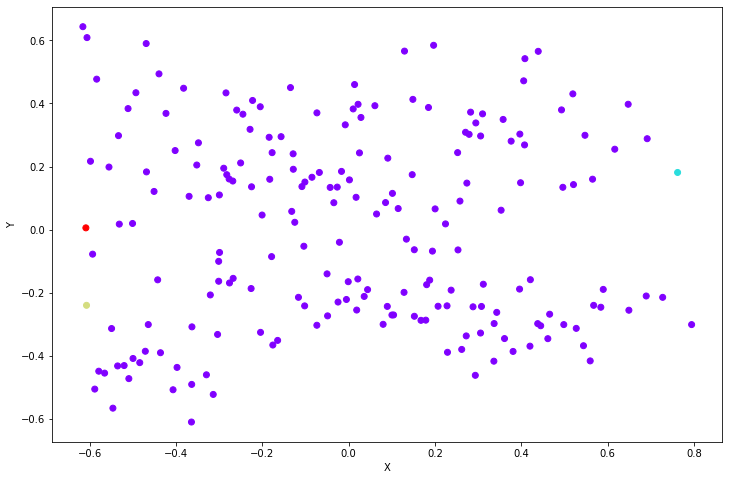

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="single")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Hierarchical Clustering - Average link

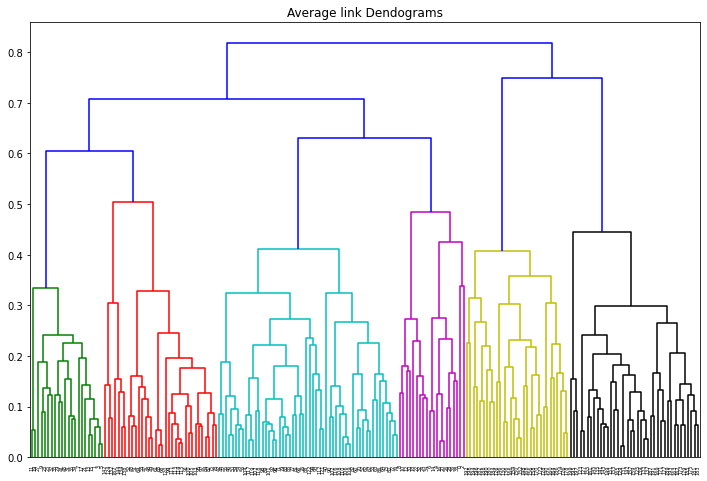

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Average link")
dend = shc.dendrogram(shc.linkage(Scaled_Df, method="average"))
plt.show()

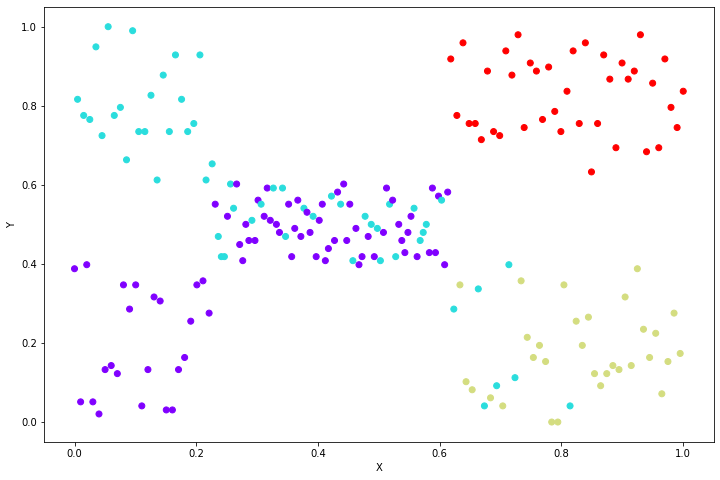

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:,3], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

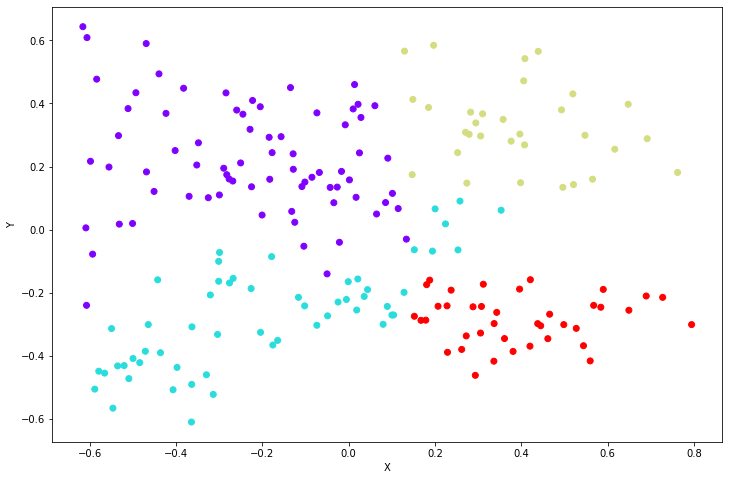

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

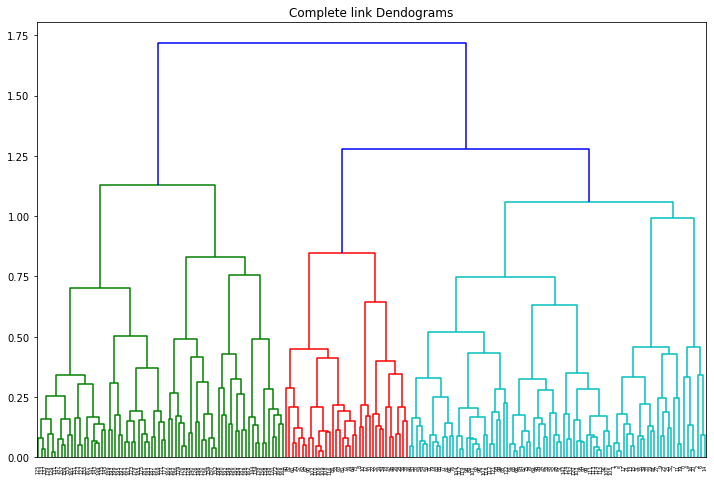

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Complete link Dendograms")
dend = shc.dendrogram(shc.linkage(Scaled_Df, method="complete"))
plt.show()

*GAUSSIAN MIXTURE MODELS*

In [ ]:
from sklearn import mixture
#Applying Gaussian Mixture function
model_gm = mixture.GaussianMixture(n_components=5).fit_predict(Scaled_Df)

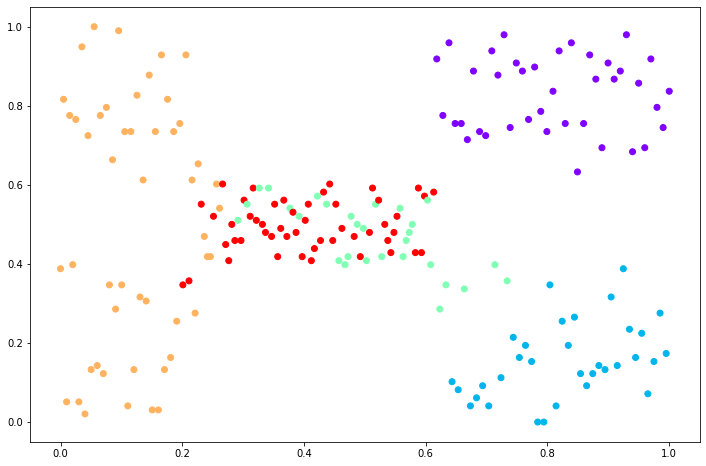

In [ ]:
plt.figure(figsize=(12, 8))  
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:, 3], c=model_gm, cmap='rainbow')

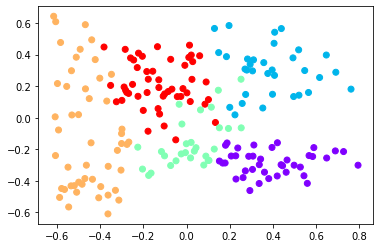

In [ ]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=model_gm,cmap='rainbow')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
g_cluster = GaussianMixture(n_components = 3)
g_cluster = g_cluster.fit(df)
g_labels = g_cluster.predict(df)
print('Converged:', g_cluster.converged_)

Converged: True


Text(0.5, 1.0, 'Age vs Annual Income')

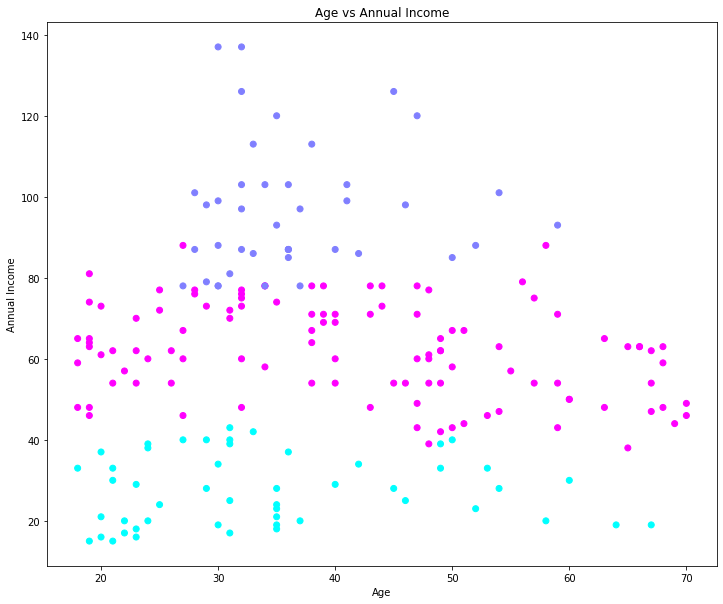

In [ ]:
plt.figure( figsize=(12,10))
plt.scatter(df['Age'] ,df['Annual Income (k$)'], 
            c= g_labels, cmap = 'cool')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')

**DBSCAN**

In [ ]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 14.8 MB 5.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Colab mode enabled.


In [ ]:
pip install --upgrade numpy

     |████████████████████████████████| 15.7 MB 5.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
pycaret 2.3.5 requires numpy==1.19.5, but you have numpy 1.21.4 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# importing colab model
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# I am using the same dataset as used in the above techniques
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [ ]:
data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_notused = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_notused.shape))

Data for Modeling: (190, 4)
Unseen Data For Predictions: (10, 4)


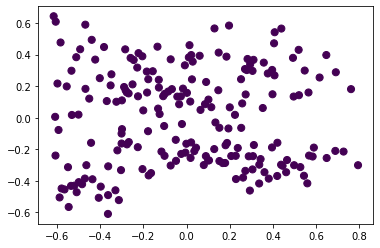

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN()
dbscan_labels = dbscan_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=50, cmap='viridis');